In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import random

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, _ = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=0.5, shuffle=True, random_state=0)

X_train, X_val, _ , _ = train_test_split(X_train, _ , train_size=0.7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)


In [3]:
#[Problem 1] Determine the initial value of the center point
def initial_centroied(X, K):
      """
      A function that select initial values of center point from dataset
      
      Parameters
      ----------
      X: The following form of ndarray (n_samples, n_features)
          The training data

      K: int value
          The number of clusters for clustering

      Returns
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The initial values of center points

      """

      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,n-1)]]

      return centroids

In [4]:
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Initial centroids: \n{}".format(centroids))

Initial centroids: 
[[ 1.99895108 -0.04604816 -0.04604816]
 [-1.48908103 -0.79111937 -0.79111937]]


In [5]:
#[Problem 3] Allocation to cluster
def euclidean(X, Y):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          First point

      Y: The following form of ndarray (n_sample, n_features)
          Second point

      Returns
      ----------
      distance: float value
          The euclidean distance of two points

      """

      return np.sum((X - Y)**2, axis=1)

In [6]:
x_temp = np.array([[0,1],[1,4]])
y_temp = np.array([[2,4],[-1,3]])
print("Distance: {}".format(euclidean(x_temp, y_temp)))

# Test with our first 20 rows of original data and centroids at cluster 1
distance_array = euclidean(X_train[0:20], centroids[:,0])
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))

Distance: [13  5]
Distance: 
[0.00000000e+00 4.66917239e+00 1.46698480e+01 3.80039057e+00
 4.88351857e+00 1.10471310e-03 4.55509285e-02 4.82599842e+00
 4.27838071e+00 1.62156521e+01 1.69432746e+01 1.94384876e-02
 1.20881874e+01 4.32974256e+00 1.83836110e+01 1.55097631e+01
 1.07577755e+01 1.09240725e+01 1.67548345e+01 4.70225732e+00]
Shape: (20,)


In [7]:
def euclidean_all(X, centroids):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      Returns
      ----------
      euclidean_all: The following form of ndarray (n_samples, n_cluster)
          The euclidean distance of all points respect to each centroids

      """
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

In [8]:

# Test with our original data and centroids
distance_array = euclidean_all(X_train, centroids)
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))
     

Distance: 
[[0.00000000e+00 4.66917239e+00 4.66917239e+00]
 [4.66917239e+00 0.00000000e+00 0.00000000e+00]
 [1.46698480e+01 4.63986982e+00 4.63986982e+00]
 [3.80039057e+00 6.89851802e-02 6.89851802e-02]
 [4.88351857e+00 3.82156265e-02 3.82156265e-02]
 [1.10471310e-03 4.52664331e+00 4.52664331e+00]
 [4.55509285e-02 3.80712580e+00 3.80712580e+00]
 [4.82599842e+00 6.86146632e-02 6.86146632e-02]
 [4.27838071e+00 4.68175926e-02 4.68175926e-02]
 [1.62156521e+01 5.14290871e+00 5.14290871e+00]
 [1.69432746e+01 5.49514805e+00 5.49514805e+00]
 [1.94384876e-02 4.82996247e+00 4.82996247e+00]
 [1.20881874e+01 2.06877830e+00 2.06877830e+00]
 [4.32974256e+00 1.09737773e-01 1.09737773e-01]
 [1.83836110e+01 6.89404237e+00 6.89404237e+00]
 [1.55097631e+01 5.74381971e+00 5.74381971e+00]
 [1.07577755e+01 2.38619150e+00 2.38619150e+00]
 [1.09240725e+01 1.63551037e+00 1.63551037e+00]
 [1.67548345e+01 5.87499767e+00 5.87499767e+00]
 [4.70225732e+00 9.64169750e-02 9.64169750e-02]
 [1.05338027e+01 1.27985503e+

In [9]:
C = np.argmin(distance_array,axis=1)+1
C

array([1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1])

In [10]:
def cluster_allocation(X, distance_array):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      """
      
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data
     

In [11]:
clustered_data = cluster_allocation(X_train, distance_array)

print("Cluster 1 data: \n{}\n".format(clustered_data[1]))
print("Cluster 2 data: \n{}\n".format(clustered_data[2]))
print("Cluster 3 data: \n{}\n".format(clustered_data[3]))

Cluster 1 data: 
[[ 1.99895108 -1.48908103]
 [ 1.96739882 -1.47863267]
 [ 1.78791384 -1.45723436]
 [ 2.07368307 -1.37137964]
 [ 2.01217022 -1.69272293]
 [ 1.87204178 -1.46217211]
 [ 2.05050033 -1.41928757]
 [ 2.03117261 -1.3474296 ]
 [ 1.84765516 -1.78117521]
 [ 1.79700803 -1.36763129]
 [ 2.04219863 -1.55733779]
 [ 1.83521529 -1.24500295]
 [ 1.82693713 -1.56282194]]

Cluster 2 data: 
[[-0.04604816 -0.79111937]
 [-0.65119089  1.2761668 ]
 [ 0.2071129  -0.72115754]
 [-0.02286239 -0.59701103]
 [ 0.01898689 -0.53737717]
 [ 0.11154815 -0.64285949]
 [-0.89382949  1.31225305]
 [-0.96788333  1.3641922 ]
 [-0.98118803  0.30171718]
 [ 0.15391338 -0.52701115]
 [-0.86184025  1.70458206]
 [-0.48827593  1.5643539 ]
 [-0.44164657  0.70209642]
 [-0.83085562  0.21862695]
 [-0.77565658  1.5203021 ]
 [ 0.06800622 -0.50231395]
 [-0.92315277 -0.07659677]
 [-0.88469878  1.43443282]
 [-0.27063655  0.38135718]
 [-0.05825563 -0.5379779 ]
 [-0.35636904  0.22224369]
 [-0.95615303  1.55010171]
 [-0.28649687  0.36

In [12]:
#[Problem 4] Movement of the center point
def centroid_fix(clustered_data, centroids):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      Returns
      ----------
      new_centroids: The following form of ndarray (n_features, n_clusters)
          The new centroids after being fixed
      """
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids

In [14]:
new_centroids = centroid_fix(clustered_data, centroids)
print("Old centroids value: \n{}".format(centroids))
print("New centroids value: \n{}".format(new_centroids))

Old centroids value: 
[[ 1.93406508 -0.44110256         nan]
 [-1.47937762  0.33740191         nan]]
New centroids value: 
[[ 1.93406508 -0.44110256         nan]
 [-1.47937762  0.33740191         nan]]


In [15]:
#[Problem 2] Creation of a function to obtain SSE
def SSE(distance_array):
      """
      A function that calculate sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster
      
      Parameters
      ----------
      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      sse: float value
          The sum squared error calculated among cluster
      """

      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse

In [16]:
#[Problem 5] Repeat
iter = 5
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Old centroids value: \n{}\n".format(centroids))

# Repeat clustering
for i in range(iter):
    # Get all distance from each point to centroid
    distance_array = euclidean_all(X_train, centroids)
    # Calculate the sum squared error
    sse = SSE(distance_array)
    # Allocate data to every clusters
    clustered_data = cluster_allocation(X_train, distance_array)
    # Update centroid in each cluster
    new_centroids = centroid_fix(clustered_data, centroids)
    print("Iteration {}\n Sum squared error: {}\nNew centroids value: \n{}\n\n".format(i+1, sse, new_centroids))
     

Old centroids value: 
[[ 1.99895108 -0.04604816 -0.04604816]
 [-1.48908103 -0.79111937 -0.79111937]]

Iteration 1
 Sum squared error: 8662.847974551165
New centroids value: 
[[ 1.93406508 -0.44110256         nan]
 [-1.47937762  0.33740191         nan]]


Iteration 2
 Sum squared error: nan
New centroids value: 
[[            nan             nan -2.53765263e-17]
 [            nan             nan  3.42583105e-16]]


Iteration 3
 Sum squared error: nan
New centroids value: 
[[-2.53765263e-17             nan             nan]
 [ 3.42583105e-16             nan             nan]]


Iteration 4
 Sum squared error: nan
New centroids value: 
[[            nan -2.53765263e-17             nan]
 [            nan  3.42583105e-16             nan]]


Iteration 5
 Sum squared error: nan
New centroids value: 
[[-2.53765263e-17             nan             nan]
 [ 3.42583105e-16             nan             nan]]




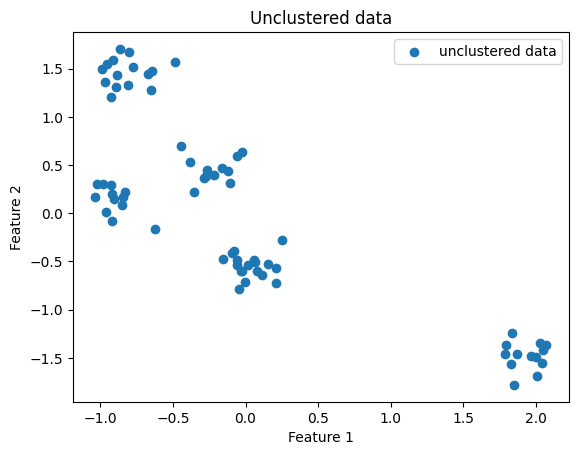

In [17]:

# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()
     

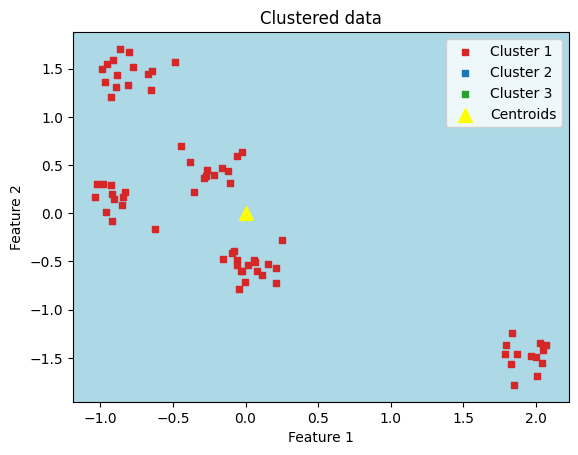

In [20]:

color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(clustered_data[k+1][:,0],
                clustered_data[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(new_centroids[0,:],
            new_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()
     

In [21]:
#[Problem 6] - [Problem 7]

from numpy import linalg as LA

class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose


    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        self.cluster_output = {}
        self.cluster_centroid = np.array([]).reshape(X.shape[1], 0)
        self.best_sse = 10e7

        self.poor_division = False

        for init in range(self.n_init):
            centroids = self.initial_centroid(X, self.n_clusters)
            print("\nInitial {}\n".format(init))
            for i in range(self.max_iter):
                # Get all distance from each point to centroid
                prev_centroids = centroids

                distance_array = self.euclidean_all(X, centroids)

                # Calculate the sum squared error
                sse = self.SSE()

                # Allocate data to every clusters
                clustered_data = self.cluster_allocation(X, distance_array)
                
                # Check if there is less cluster compared to the input K
                for key in clustered_data.keys():
                    if len(clustered_data[key]) == 0:
                      print("\nCluster division performed poorly! Skip this clustering . . .")
                      self.poor_division = True

                if self.poor_division == True:
                    break

                # Update centroid in each cluster
                centroids = self.centroid_fix(clustered_data, centroids)

                #if sse < self.best_sse:
                self.best_sse = sse
                self.cluster_output = clustered_data
                self.cluster_centroid = centroids

                if self.verbose == True:
                    if (i % 100 == 0 and i > 0):
                        print("Iteration {}".format(i))

                #if (LA.norm(centroids - prev_centroids) <= self.tol):
                #    print("\nCentroids has reach their convergence! Stop learning . . .")
                #    break


    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """

        distance_array = self.euclidean_all(X, self.cluster_centroid)
        clustered_data = self.cluster_allocation(X, distance_array)

        return clustered_data, self.cluster_centroid


    def initial_centroid(self, X, K):
      """
      A function that select initial values of center point from dataset
      
      Parameters
      ----------
      X: The following form of ndarray (n_samples, n_features)
          The training data

      K: int value
          The number of clusters for clustering

      Returns
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The initial values of center points

      """
      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,len(X)-1)]]

      return centroids


    def euclidean(self, X, Y):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          First point

      Y: The following form of ndarray (n_sample, n_features)
          Second point

      Returns
      ----------
      distance: float value
          The euclidean distance of two points

      """

      return np.sum((X - Y)**2, axis=1)

    
    def euclidean_all(self, X, centroids):
      """
      A function that calculate the euclidean distance between two points
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      Returns
      ----------
      euclidean_all: The following form of ndarray (n_samples, n_cluster)
          The euclidean distance of all points respect to each centroids

      """
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = self.euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

    
    def cluster_allocation(self, X, distance_array):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      X: The following form of ndarray (n_sample, n_features)
          Each of the sample row in dataset

      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      """
      
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data

    
    def centroid_fix(self, clustered_data, centroids):
      """
      A function that calculate allocate each point to the corresponding cluster
      
      Parameters
      ----------
      centroids: The following form of ndarray (n_features, n_clusters)
          The chosen centroids

      cluster_data: The form of dictionary
          The dictionary store the points in all clusters

      Returns
      ----------
      new_centroids: The following form of ndarray (n_features, n_clusters)
          The new centroids after being fixed
      """
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids


    def SSE(self):
      """
      A function that calculate sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster
      
      Parameters
      ----------
      distance_array: The following form of ndarray (n_features, n_clusters)
          The array containing distance of each point respect to all clusters

      Returns
      ----------
      sse: float value
          The sum squared error calculated among cluster
      """

      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse


    def WSSE(self):
      """
      A function that calculate within sum squared error, that is, the sum of the distance of each point with its centroid, in every cluster

      Returns
      ----------
      wsse: float value
          The sum squared error calculated among cluster
      """

      wsse = 0
      
      for k in range(self.n_clusters):
            wsse+=np.sum((self.cluster_output[k+1]-self.cluster_centroid[:,k])**2)
  
      return wsse

In [22]:

K = 3
iter = 1000
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(X_train)


Initial 0

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 1

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 2

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 3

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 4

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 5

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 6

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 7

Iteration 100
Iteratio

In [23]:

best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: nan
Final centroids: 
[[-0.14638031 -0.72566198  1.93406508]
 [-0.28220464  0.93564272 -1.47937762]]


In [24]:

output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))

Cluster 1 data: 
[[-0.04604816 -0.79111937]
 [ 0.2071129  -0.72115754]
 [-0.02286239 -0.59701103]
 [ 0.01898689 -0.53737717]
 [ 0.11154815 -0.64285949]
 [ 0.15391338 -0.52701115]
 [ 0.06800622 -0.50231395]
 [-0.92315277 -0.07659677]
 [-0.27063655  0.38135718]
 [-0.05825563 -0.5379779 ]
 [-0.35636904  0.22224369]
 [-0.28649687  0.36202928]
 [-0.07944859 -0.39526509]
 [-0.10833692  0.31874013]
 [-0.02780728 -0.5965572 ]
 [ 0.21221864 -0.57098603]
 [-0.05672155 -0.49029474]
 [-0.95957971  0.00850655]
 [-0.85306922  0.08703353]
 [-0.62536088 -0.16205369]
 [ 0.08238632 -0.60256858]
 [ 0.25234388 -0.2754814 ]
 [-0.00684757 -0.71344275]
 [ 0.05572779 -0.48439702]
 [-0.09168783 -0.41713457]
 [-0.12174323  0.44171297]
 [-0.15198455 -0.4794928 ]
 [-0.21448407  0.39774505]]

Cluster 2 data: 
[[-0.65119089  1.2761668 ]
 [-0.89382949  1.31225305]
 [-0.96788333  1.3641922 ]
 [-0.98118803  0.30171718]
 [-0.86184025  1.70458206]
 [-0.48827593  1.5643539 ]
 [-0.44164657  0.70209642]
 [-0.83085562  0.21

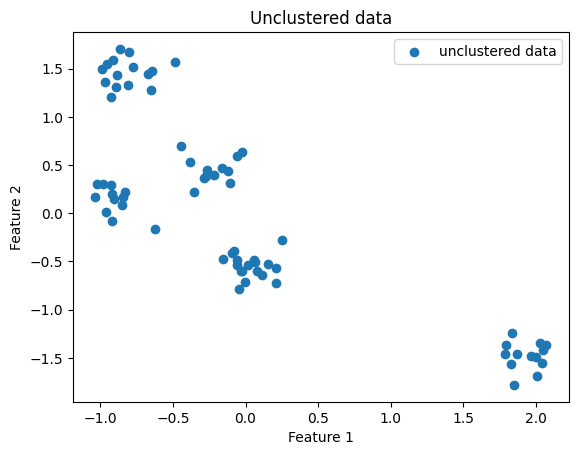

In [25]:

# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

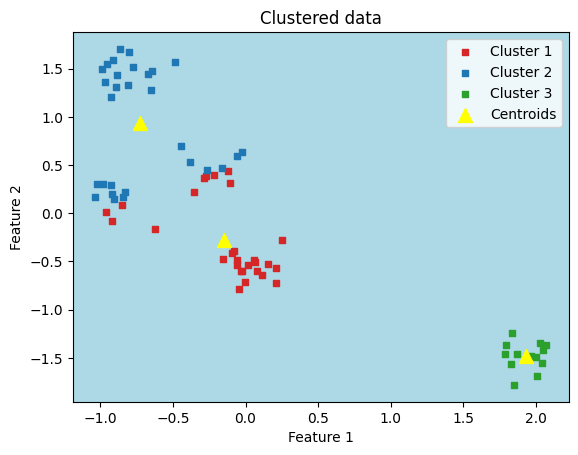

In [26]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [27]:

y_pred, estimate_centroids = scratch_cluster_model.predict(X_val)

print("Cluster 1 data: \n{}\n".format(y_pred[1]))
print("Cluster 2 data: \n{}\n".format(y_pred[2]))
print("Cluster 3 data: \n{}\n".format(y_pred[3]))

Cluster 1 data: 
[[-0.09693545 -0.60032463]
 [-0.21309033  0.34210093]
 [ 0.06242347 -0.73835009]
 [-0.072267    0.43565687]
 [-0.80249058 -0.09287014]
 [-0.35627963  0.17966689]
 [-0.62468841  0.19625066]
 [ 0.02022425  0.25556129]
 [-0.76721125  0.12437104]
 [-0.73442546  0.04328065]]

Cluster 2 data: 
[[-0.77415283  0.1985807 ]
 [-0.73370391  1.32595722]
 [-0.71217113  1.45351158]
 [-0.44286096  0.43456378]
 [-0.85674163  1.58106152]
 [-0.23194453  0.51975298]
 [-0.87272809  1.56128398]
 [-0.61808455  0.2790708 ]
 [-0.91774731  1.42042198]
 [-0.55483792  0.5594649 ]
 [-0.23324471  0.67489361]
 [-0.80488242  0.16749328]
 [-0.84612339  0.32309328]]

Cluster 3 data: 
[[ 1.68421704 -1.48237193]
 [ 1.68602804 -1.64608495]
 [ 1.72355407 -1.6162627 ]
 [ 1.80456717 -1.68097426]
 [ 1.98618155 -1.25517676]
 [ 1.7253375  -1.55426149]
 [ 1.57407838 -1.40936099]]



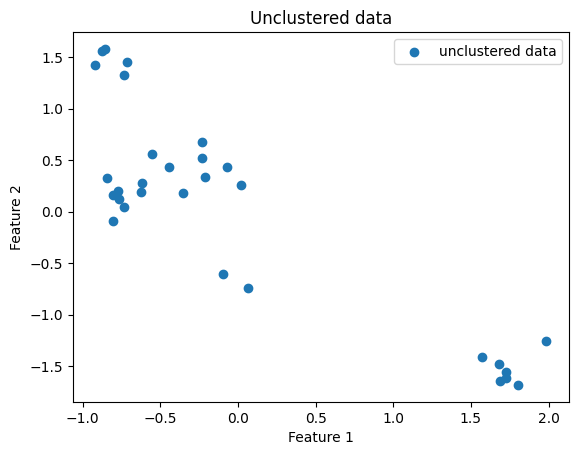

In [28]:
# Unclustered data
plt.scatter(X_val[:,0], X_val[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

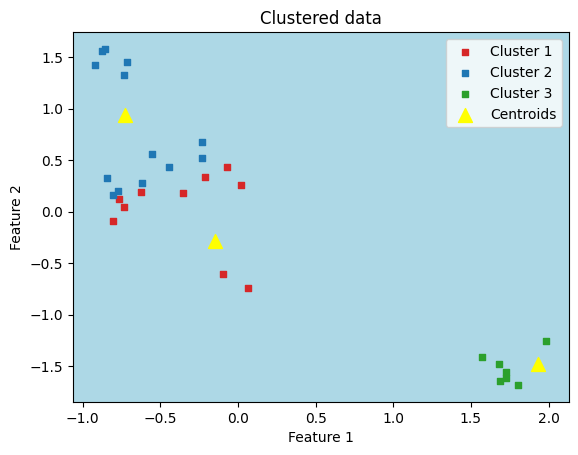

In [29]:

color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(y_pred[k+1][:,0],
                y_pred[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(estimate_centroids[0,:],
            estimate_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [30]:
#[Problem 8] Implementation of elbow method

def elbow(X, K_min, K_max):
    """
    A function that select the best K value (number of clusters)

    """
    iter = 100
    n_init = 5
    tol = 1e-4

    sse_array=np.array([])

    for K in range (K_min, K_max):
        print("---------------\nNumber of clusters: {}".format(K))
        scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
        scratch_cluster_model.fit(X)
        output, centroids = scratch_cluster_model.cluster_output, scratch_cluster_model.cluster_centroid.T
        sse=0
        for k in range(K):
            sse+=np.sum((output[k+1]-centroids[k,:])**2)

        sse_array=np.append(sse_array,sse)

    return sse_array

In [38]:
#[Problem 8] Implementation of elbow method
X_train, _ = make_blobs(n_samples=200, centers=5, random_state=42)

K_min = 1
K_max = 6

sse_list = elbow(X_train, K_min, K_max)

---------------
Number of clusters: 1

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 2

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 3

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 4

Initial 0


Initial 1


Cluster division performed poorly! Skip this clustering . . .

Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 5

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4



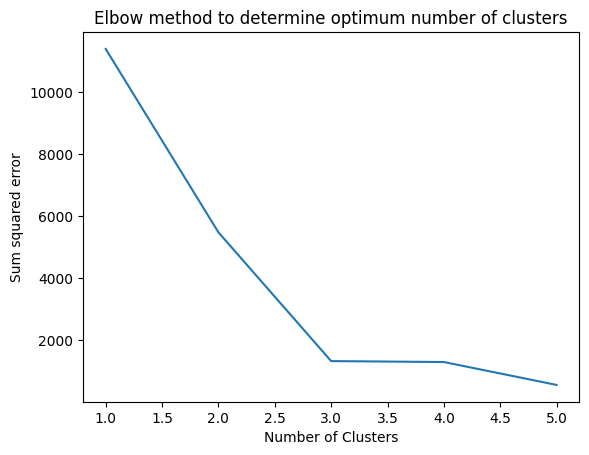

In [40]:
K_array=np.arange(1,6,1)
plt.plot(K_array,sse_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum squared error')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [44]:
df_train = pd.read_csv('wholesale.csv')
print("Train dataset -- Rows: {}, Columns: {}".format(df_train.shape[0], df_train.shape[1]))

Train dataset -- Rows: 440, Columns: 8


In [45]:

df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_train)
df_pca = pca.transform(df_train)

print("Train dataset -- Rows: {}, Columns: {}".format(df_pca.shape[0], df_pca.shape[1]))
df_pd = pd.DataFrame(data=df_pca)
df_pd.head(10)

Train dataset -- Rows: 440, Columns: 2


,0,1
0,650.022120,1585.519107
1,-4426.804984,4042.451521
2,-4841.998710,2578.762188
3,990.346444,-6279.806002
4,10657.998731,-2159.725789
5,-2765.961593,-959.870712
6,-715.550892,-2013.002249
7,-4474.583669,1429.496985
8,-6712.095393,-2205.909168
9,-4823.634365,13480.559214


In [47]:
#[Problem 11] Comparison with known groups

K = 5
iter = 100
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(df_pca)


Initial 0


Initial 1


Initial 2


Initial 3


Initial 4


Initial 5


Initial 6


Initial 7


Initial 8


Initial 9



In [48]:

best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: nan
Final centroids: 
[[-5607.91711162  8916.05498322 -6399.71175178 14537.71769494
  37090.26268465]
 [14199.18040566 -4762.41444013 -4169.29691651 61715.67086327
  -5656.14398147]]


In [49]:

output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))
print("Cluster 4 data: \n{}\n".format(output[4]))
print("Cluster 5 data: \n{}\n".format(output[5]))

Cluster 1 data: 
[[ -4823.63436538  13480.55921363]
 [ -7974.82899002   5711.21893341]
 [-10589.5235647    6584.21594887]
 [ 19941.08821484  26312.65462657]
 [ -4895.51898736  24552.37355922]
 [  3692.39103746   6864.58649138]
 [ -6058.93888026  14122.30777082]
 [ -1047.26388009   7831.4600598 ]
 [ -9967.85365411  18648.76241933]
 [ -3853.4584246   21374.17610944]
 [ -7070.67862779  17409.4280443 ]
 [ -3979.64869852  28779.19423027]
 [-10914.6928103    7389.76247173]
 [ -3819.71921443  33191.60420903]
 [ -6283.36928917   6557.39319324]
 [ -1434.56580013  11006.44945225]
 [  1867.85098537  22634.71585879]
 [-11207.13287446   9944.87021583]
 [  1529.14228715  35961.51367782]
 [ -5777.89750806   7364.9327762 ]
 [   195.05348205   6238.74394341]
 [ -9444.12629701  11579.44852721]
 [ -2254.08154904  10388.53399485]
 [ -8181.09339039  22105.01390683]
 [  1430.40492958  11381.08231023]
 [ 11436.24946257  24516.85627133]
 [ -8926.22097545  15697.14753921]
 [ -7948.75904118   7460.8331425 ]
 [-

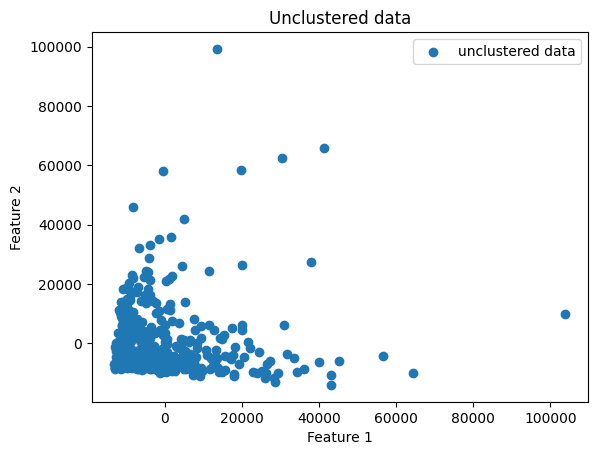

In [50]:

# Unclustered data
plt.scatter(df_pca[:,0], df_pca[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

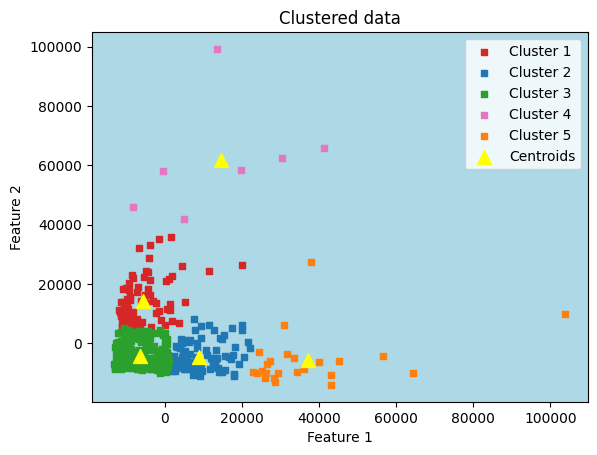

In [51]:

color = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:orange']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [52]:
#[Problem 11] Comparison with known groups

print("All region types: {}".format(df_train['Region'].unique()))
print("All channel types: {}".format(df_train['Channel'].unique()))

All region types: [3 1 2]
All channel types: [2 1]


In [53]:
df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


<Axes: xlabel='Fresh', ylabel='Grocery'>

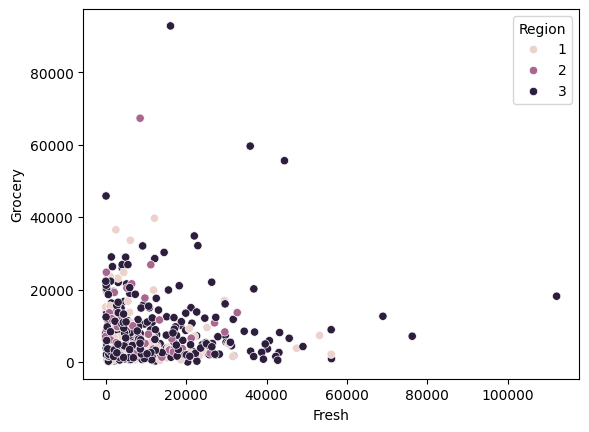

In [54]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Region")

<Axes: xlabel='Fresh', ylabel='Grocery'>

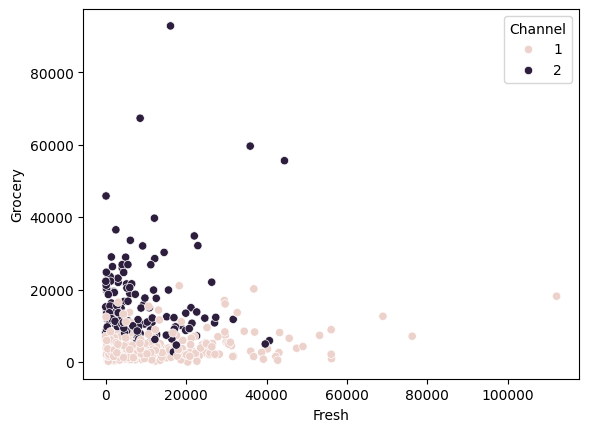

In [55]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Channel")

Text(0.5, 1.0, 'Region 3')

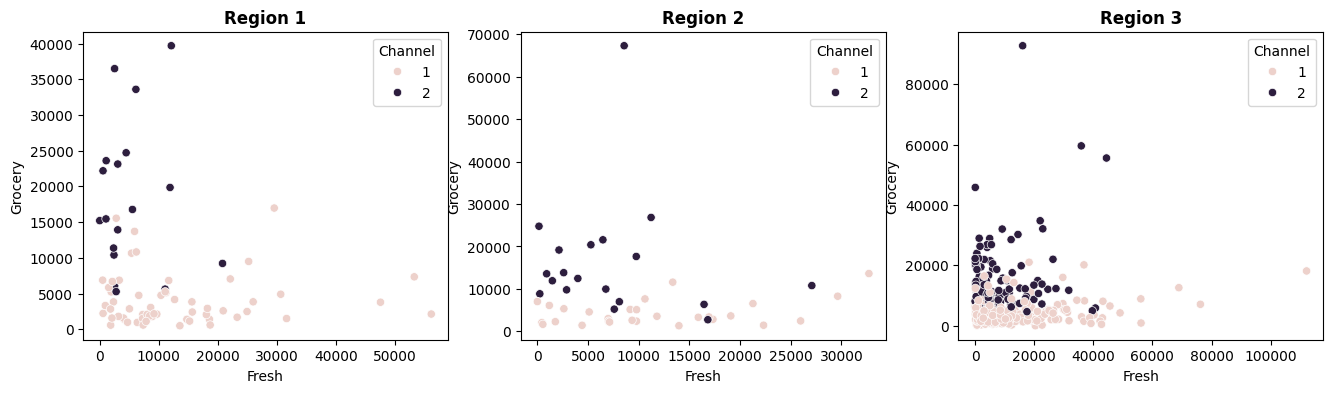

In [56]:
#[Problem 12] Useful information for wholesalers

fig, axes = plt.subplots(1,3, figsize=(16,4))
ax = axes[0]
sns.scatterplot(data=df_train[df_train.Region == 1], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 1', fontweight ="bold")

ax = axes[1]
sns.scatterplot(data=df_train[df_train.Region == 2], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 2', fontweight ="bold")

ax = axes[2]
sns.scatterplot(data=df_train[df_train.Region == 3], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 3', fontweight ="bold")